Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score,classification_report,confusion_matrix

In [3]:
df_train_original = pd.read_csv('./data/train.csv', low_memory=False)
df_train = df_train_original.copy()

pd.set_option('display.max_columns', 200)

In [4]:
df_train.shape

(100000, 28)

EDA

In [5]:
df_train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [6]:
df_train.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [8]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000


In [9]:
df_train.describe(exclude=np.number).T

,count,unique,top,freq
ID,100000,100000,0x1602,1
Customer_ID,100000,12500,CUS_0xd40,8
Month,100000,8,January,12500
Name,90015,10139,Langep,44
Age,100000,1788,38,2833
SSN,100000,12501,#F%$D@*&8,5572
Occupation,100000,16,_______,7062
Annual_Income,100000,18940,17273.83,16
Num_of_Loan,100000,434,3,14386
Type_of_Loan,88592,6260,Not Specified,1408


Helper functions

In [10]:
def details(df, column, head=0):
    print(f'DType {df[column].dtype}')
    print(f'Uniques: {df[column].nunique()}')
    print(f'Missing values: {df[column].isnull().sum()}')
    print(f'Null percentage: {(df[column].isnull().sum() / len(df)) * 100}')
    print(f'Total values {len(df[column])})')

    if head != 0:
        print(df[column].head(head))

def cat_col(df, column):
    details(df, column)

    if df[column].nunique() > 50:
        print(f"Too many unique values ({df[column].nunique()}.")
        return

    value_counts = df[column].value_counts()
    value_percentages = df[column].value_counts(normalize=True) * 100

    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    sns.countplot(data=df,
                  x=column,
                  hue=column,
                  palette='Set2',
                  ax=axes[0])
    axes[0].set_title(f'Count Plot: {column}', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Count', fontsize=12)
    axes[0].set_ylabel(column, fontsize=12)

    if df[column].nunique() > 3:
        axes[0].tick_params(axis='x', rotation=45)



    for p in axes[0].patches:
         height = p.get_height()
         axes[0].text(p.get_x() + p.get_width()/2., height + 10, f'{int(height)}', ha='center')

    if df[column].nunique() <= 10:
        axes[1].pie(value_counts,
                    labels=value_counts.index,
                    autopct='%1.1f%%',)
        axes[1].set_title(f'Proportion: {column}')
    else:
        top_categories_pct = value_percentages.head(15)
        axes[1].barh(range(len(top_categories_pct)), top_categories_pct.values, color='teal')
        axes[1].set_yticks(range(len(top_categories_pct)))
        axes[1].set_yticklabels(top_categories_pct.index)
        axes[1].set_xlabel('Percentage (%)', fontsize=12)
        axes[1].set_title(f'Top 15 Categories by Percentage: {column}',
                         fontsize=14, fontweight='bold')
        axes[1].invert_yaxis()

    plt.tight_layout()
    plt.show()


def num_col(df, column, xlim=None):
    details(df, column)

    print(f"\nStatistics:")
    stats = df[column].describe()
    print(stats)

    n_unique = df[column].nunique()
    n_total = len(df)
    if n_unique == n_total or (n_unique > 100 and n_unique/n_total > 0.9):
        print(f"Too many unique values ({n_unique} out of {n_total} records).")
        return

    fig, axes = plt.subplots(1, 2, figsize=(15, 8))

    if xlim is not None:
        axes[0].set_xlim(xlim)

    sns.histplot(data=df, x=column, kde=True, bins=30, color='skyblue', ax=axes[0])
    axes[0].axvline(df[column].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
    axes[0].axvline(df[column].median(), color='green', linestyle='--', linewidth=2, label='Median')
    axes[0].set_title(f'Distribution: {column}', fontsize=14, fontweight='bold')
    axes[0].set_xlabel(column, fontsize=12)
    axes[0].set_ylabel('Frequency', fontsize=12)
    axes[0].legend()

    sns.boxplot(data=df, y=column, color='lightcoral', ax=axes[1])
    axes[1].set_title(f'Box Plot: {column}', fontsize=14, fontweight='bold')
    axes[1].set_ylabel(column, fontsize=12)

    plt.tight_layout()
    plt.show()

def plot_stacked_bar(df,column1,column2,rotation=45):
    print(f'\n{column1} & {column2} Distribution')

    pd.crosstab(df[column1], df[column2]).plot(kind='bar', stacked=True)

    plt.xlabel(f'{column1}')
    plt.ylabel('Number of Records')
    plt.title(f'{column1} & {column2} Distribution')
    plt.xticks(rotation=rotation)

    plt.show()

def fix_nums(num):
    try :
        return float(num.replace("_",""))
    except :
        return np.nan

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

DType object
Uniques: 3
Missing values: 0
Null percentage: 0.0
Total values 100000)


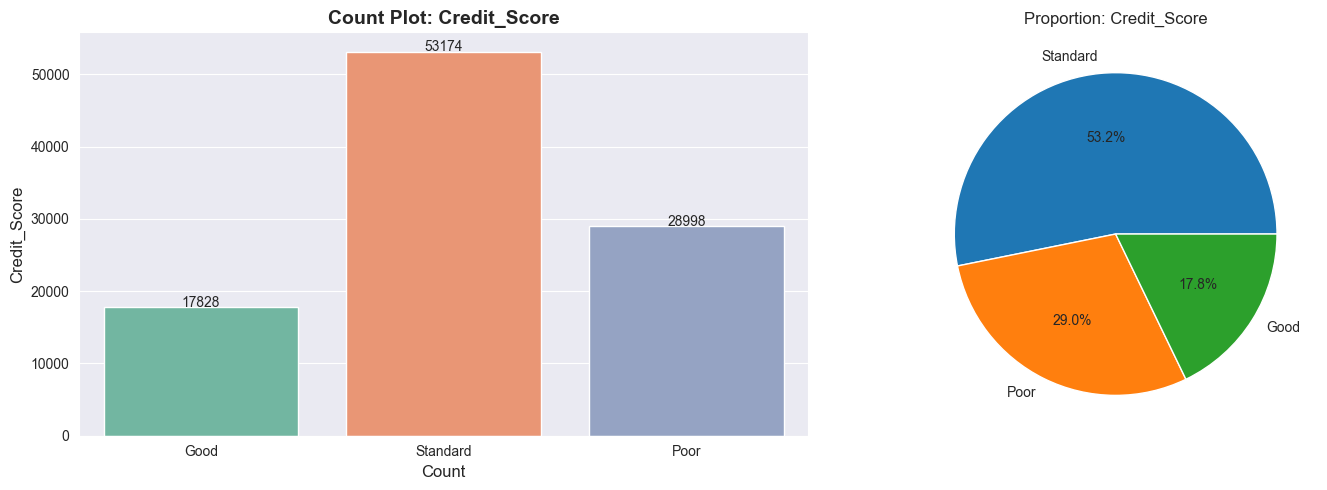

In [12]:
cat_col(df_train, 'Credit_Score')

In [13]:
df_train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [14]:
details(df_train, 'ID', 5)

DType object
Uniques: 100000
Missing values: 0
Null percentage: 0.0
Total values 100000)
0    0x1602
1    0x1603
2    0x1604
3    0x1605
4    0x1606
Name: ID, dtype: object


In [15]:
df_train.drop(columns=['ID'], inplace=True)

In [16]:
details(df_train, 'Customer_ID', 5)

DType object
Uniques: 12500
Missing values: 0
Null percentage: 0.0
Total values 100000)
0    CUS_0xd40
1    CUS_0xd40
2    CUS_0xd40
3    CUS_0xd40
4    CUS_0xd40
Name: Customer_ID, dtype: object


In [17]:
df_train.groupby(['Customer_ID'])['Credit_Score'].nunique()

Customer_ID
CUS_0x1000    2
CUS_0x1009    1
CUS_0x100b    2
CUS_0x1011    1
CUS_0x1013    1
             ..
CUS_0xff3     2
CUS_0xff4     1
CUS_0xff6     2
CUS_0xffc     2
CUS_0xffd     2
Name: Credit_Score, Length: 12500, dtype: int64

In [18]:
df_train.drop(columns=['Customer_ID'], inplace=True)

In [19]:
details(df_train, 'Month', 5)

DType object
Uniques: 8
Missing values: 0
Null percentage: 0.0
Total values 100000)
0     January
1    February
2       March
3       April
4         May
Name: Month, dtype: object


DType object
Uniques: 8
Missing values: 0
Null percentage: 0.0
Total values 100000)


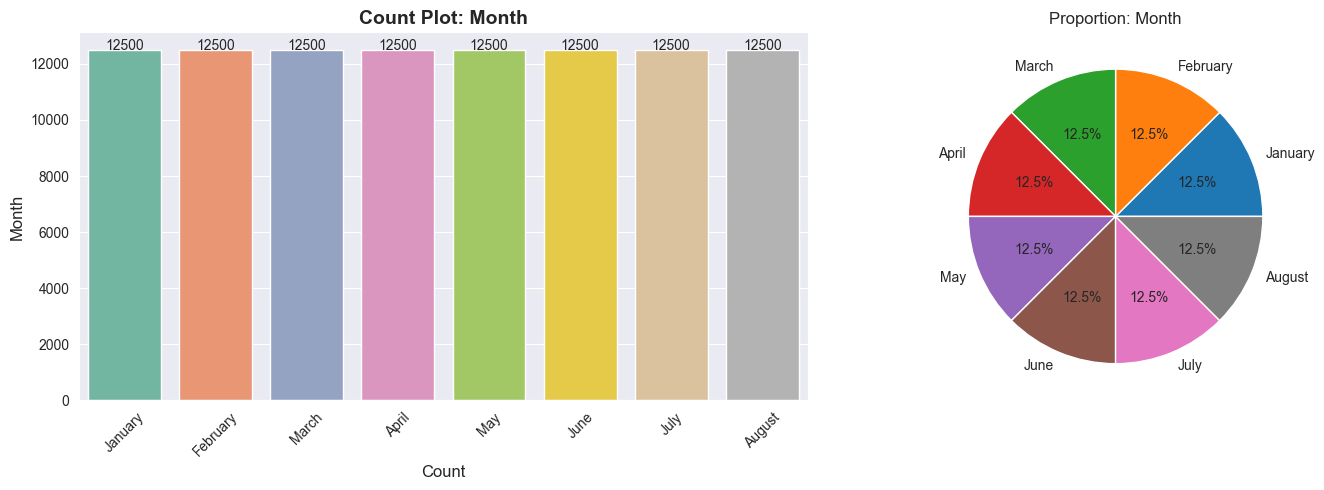

In [20]:
cat_col(df_train, 'Month')


Month & Credit_Score Distribution


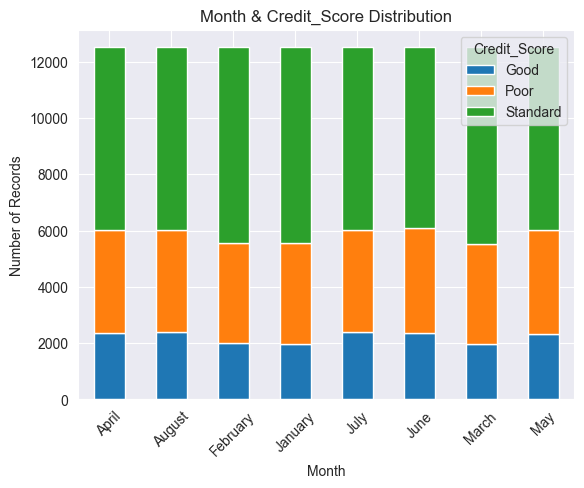

In [21]:
plot_stacked_bar(df_train,'Month','Credit_Score')

In [22]:
df_train['Month'] = pd.to_datetime(df_train.Month, format='%B').dt.month

In [23]:
df_train['Month'].head()

0    1
1    2
2    3
3    4
4    5
Name: Month, dtype: int32

In [24]:
df_train.drop(columns=['Name'], inplace=True)

In [25]:
details(df_train, 'SSN', 5)

DType object
Uniques: 12501
Missing values: 0
Null percentage: 0.0
Total values 100000)
0    821-00-0265
1    821-00-0265
2    821-00-0265
3    821-00-0265
4    821-00-0265
Name: SSN, dtype: object


In [26]:
details(df_train, 'SSN')

DType object
Uniques: 12501
Missing values: 0
Null percentage: 0.0
Total values 100000)


In [27]:
df_train.drop(columns=['SSN'], inplace=True)

In [28]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  int32  
 1   Age                       100000 non-null  object 
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  object 
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  object 
 9   Type_of_Loan              88592 non-null   object 
 10  Delay_from_due_date       100000 non-null  int64  
 11  Num_of_Delayed_Payment    92998 non-null   object 
 12  Changed_Credit_Limit      100000 non-null  object 
 13  Num_Credit_Inquiries      98035 non-null   fl

In [29]:
details(df_train, 'Age')

DType object
Uniques: 1788
Missing values: 0
Null percentage: 0.0
Total values 100000)


In [30]:
df_train['Age'].value_counts().head(20)

Age
38    2833
28    2829
31    2806
26    2792
32    2749
25    2737
36    2720
35    2716
27    2707
34    2707
39    2705
44    2688
19    2650
22    2641
41    2638
37    2605
43    2605
20    2603
30    2602
21    2594
Name: count, dtype: int64

In [31]:
df_train['Age'].sample(10).tolist()

['38', '23', '27', '42', '17', '35', '31', '42_', '44', '16']

In [32]:
df_train['Age'].unique()[:50]

array(['23', '-500', '28_', '28', '34', '54', '55', '21', '31', '33',
       '34_', '7580', '30', '30_', '24', '24_', '44', '45', '40', '41',
       '32', '33_', '35', '35_', '36', '39', '37', '181', '20', '46',
       '26', '42', '19', '31_', '48', '995', '40_', '37_', '38', '54_',
       '5079', '43', '21_', '22', '6409', '16', '7080', '18', '849',
       '3885'], dtype=object)

In [33]:
def f(p):
    return p.replace('_', '')

df_train['Age'] = df_train['Age'].apply(f)

df_train['Age'].unique()[:50]

array(['23', '-500', '28', '34', '54', '55', '21', '31', '33', '7580',
       '30', '24', '44', '45', '40', '41', '32', '35', '36', '39', '37',
       '181', '20', '46', '26', '42', '19', '48', '995', '38', '5079',
       '43', '22', '6409', '16', '7080', '18', '849', '3885', '15', '27',
       '25', '3052', '14', '5342', '17', '4431', '2657', '2111', '47'],
      dtype=object)

In [34]:
def f(p):
    if 14 <= float(p) <= 100:
        return int(p)
    else:
        return np.nan

df_train['Age'] = df_train['Age'].apply(f)

details(df_train, 'Age', 5)

DType float64
Uniques: 46
Missing values: 2776
Null percentage: 2.776
Total values 100000)
0    23.0
1    23.0
2     NaN
3    23.0
4    23.0
Name: Age, dtype: float64


DType float64
Uniques: 46
Missing values: 2776
Null percentage: 2.776
Total values 100000)

Statistics:
count    97224.000000
mean        33.323274
std         10.778909
min         14.000000
25%         24.000000
50%         33.000000
75%         42.000000
max        100.000000
Name: Age, dtype: float64


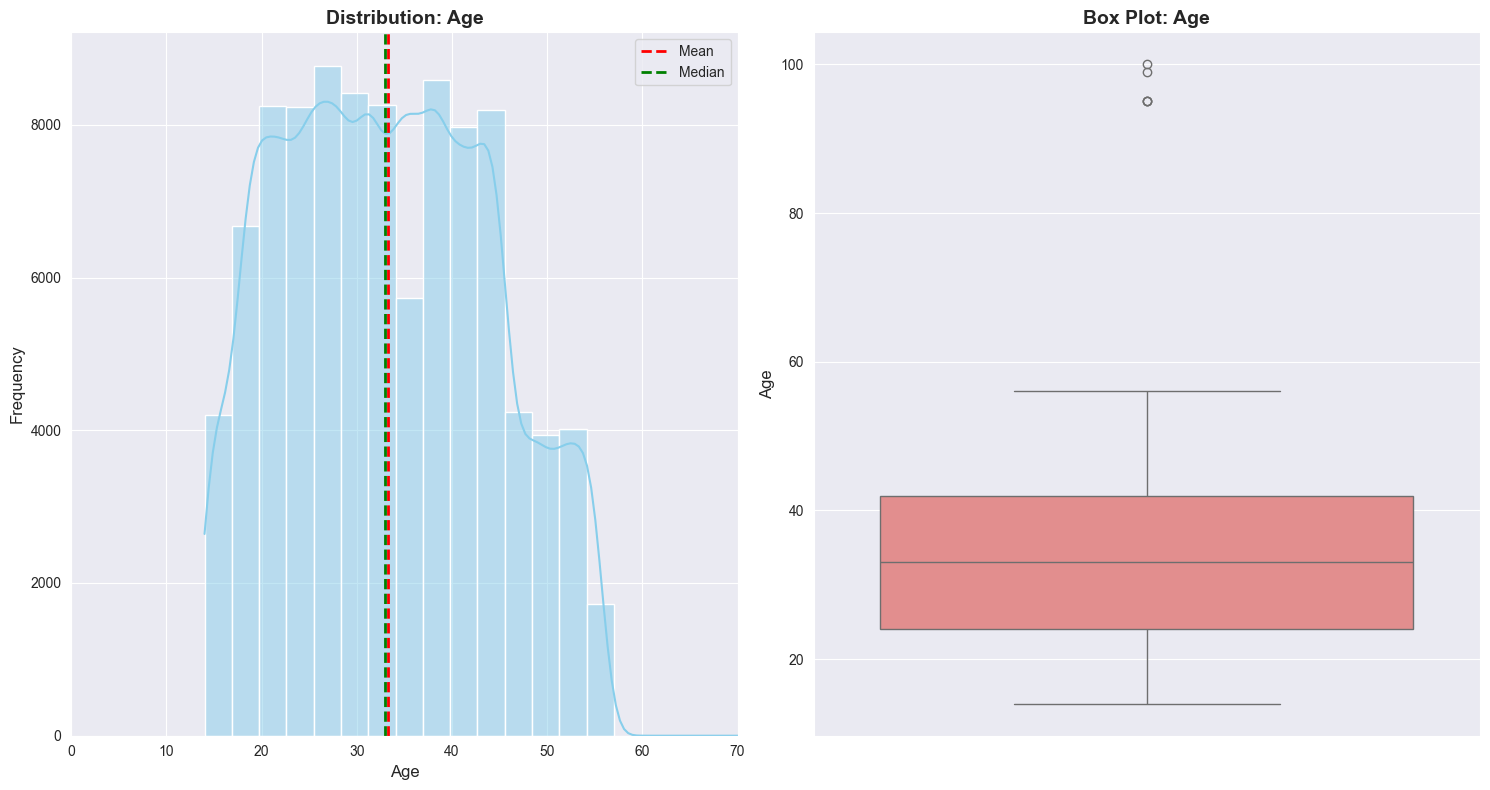

In [35]:
num_col(df_train, 'Age', xlim=(0,70))

In [36]:
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].mean())

In [37]:
details(df_train, 'Age')

DType float64
Uniques: 47
Missing values: 0
Null percentage: 0.0
Total values 100000)


In [38]:
details(df_train, 'Occupation')


DType object
Uniques: 16
Missing values: 0
Null percentage: 0.0
Total values 100000)


DType object
Uniques: 16
Missing values: 0
Null percentage: 0.0
Total values 100000)


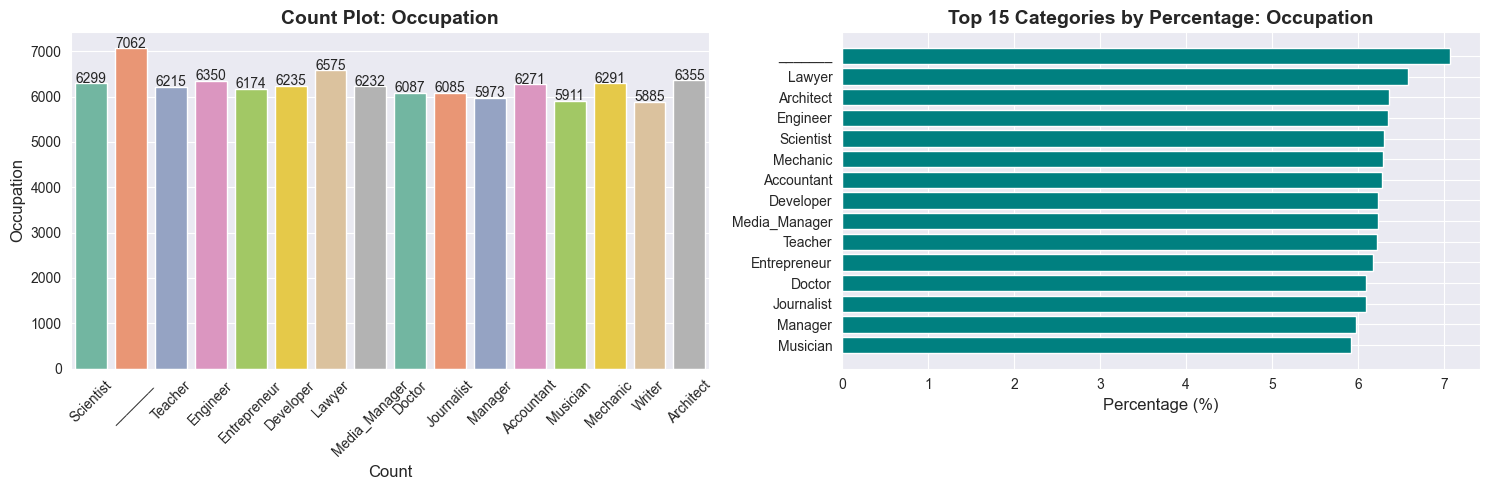

In [39]:
cat_col(df_train, 'Occupation')


Occupation & Credit_Score Distribution


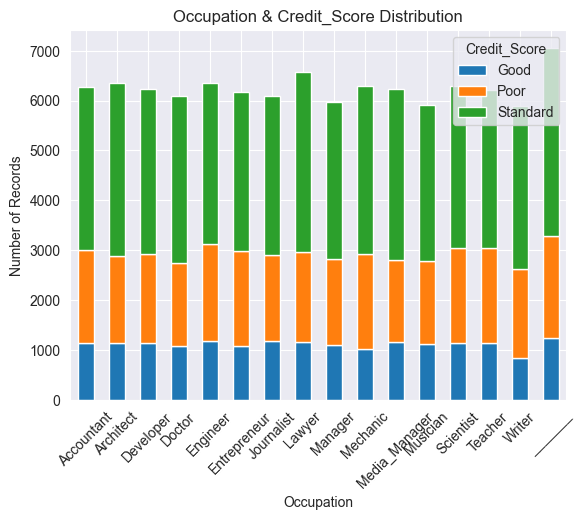

In [40]:
plot_stacked_bar(df_train, 'Occupation', 'Credit_Score')

In [41]:
details(df_train, 'Annual_Income')

DType object
Uniques: 18940
Missing values: 0
Null percentage: 0.0
Total values 100000)


In [42]:
df_train['Annual_Income'].unique()[:50]

array(['19114.12', '34847.84', '34847.84_', '143162.64', '30689.89',
       '30689.89_', '35547.71_', '35547.71', '73928.46', '131313.4',
       '10909427.0', '34081.38_', '34081.38', '114838.41', '114838.41_',
       '31370.8', '33751.27', '88640.24', '88640.24_', '54392.16',
       '54392.16_', '8701.545', '8701.545_', '25546.26', '25546.26_',
       '31993.78', '92047.08', '92047.08_', '32284.62', '97791.42',
       '97791.42_', '19300.34', '19514.88', '10183.015', '10183.015_',
       '106733.13', '106733.13_', '12600.445', '12600.445_', '57983.12',
       '57983.12_', '20787.69', '34290.12', '34290.12_', '43070.24',
       '43070.24_', '28572.39', '6515990.0_', '39641.54', '39641.54_'],
      dtype=object)

In [43]:
def f(p):

    return p.replace('_', '')

df_train['Annual_Income'] = df_train['Annual_Income'].apply(f)

df_train['Annual_Income'].unique()[:50]

array(['19114.12', '34847.84', '143162.64', '30689.89', '35547.71',
       '73928.46', '131313.4', '10909427.0', '34081.38', '114838.41',
       '31370.8', '33751.27', '88640.24', '54392.16', '8701.545',
       '25546.26', '31993.78', '92047.08', '32284.62', '97791.42',
       '19300.34', '19514.88', '10183.015', '106733.13', '12600.445',
       '57983.12', '20787.69', '34290.12', '43070.24', '28572.39',
       '6515990.0', '39641.54', '20186.02', '586359.0', '18627.64',
       '12986.745', '58317.0', '42171.98', '71681.4', '29469.98',
       '72559.36', '15566.02', '66567.32', '12909.895', '30788.44',
       '20574.47', '148699.32', '85554.03', '55829.79', '18334118.0'],
      dtype=object)

In [44]:
df_train['Annual_Income'] = df_train['Annual_Income'].apply(float)
df_train['Annual_Income'].unique()[:50]

array([1.9114120e+04, 3.4847840e+04, 1.4316264e+05, 3.0689890e+04,
       3.5547710e+04, 7.3928460e+04, 1.3131340e+05, 1.0909427e+07,
       3.4081380e+04, 1.1483841e+05, 3.1370800e+04, 3.3751270e+04,
       8.8640240e+04, 5.4392160e+04, 8.7015450e+03, 2.5546260e+04,
       3.1993780e+04, 9.2047080e+04, 3.2284620e+04, 9.7791420e+04,
       1.9300340e+04, 1.9514880e+04, 1.0183015e+04, 1.0673313e+05,
       1.2600445e+04, 5.7983120e+04, 2.0787690e+04, 3.4290120e+04,
       4.3070240e+04, 2.8572390e+04, 6.5159900e+06, 3.9641540e+04,
       2.0186020e+04, 5.8635900e+05, 1.8627640e+04, 1.2986745e+04,
       5.8317000e+04, 4.2171980e+04, 7.1681400e+04, 2.9469980e+04,
       7.2559360e+04, 1.5566020e+04, 6.6567320e+04, 1.2909895e+04,
       3.0788440e+04, 2.0574470e+04, 1.4869932e+05, 8.5554030e+04,
       5.5829790e+04, 1.8334118e+07])

In [45]:
details(df_train, 'Annual_Income')

DType float64
Uniques: 13487
Missing values: 0
Null percentage: 0.0
Total values 100000)


DType float64
Uniques: 13487
Missing values: 0
Null percentage: 0.0
Total values 100000)

Statistics:
count    1.000000e+05
mean     1.764157e+05
std      1.429618e+06
min      7.005930e+03
25%      1.945750e+04
50%      3.757861e+04
75%      7.279092e+04
max      2.419806e+07
Name: Annual_Income, dtype: float64


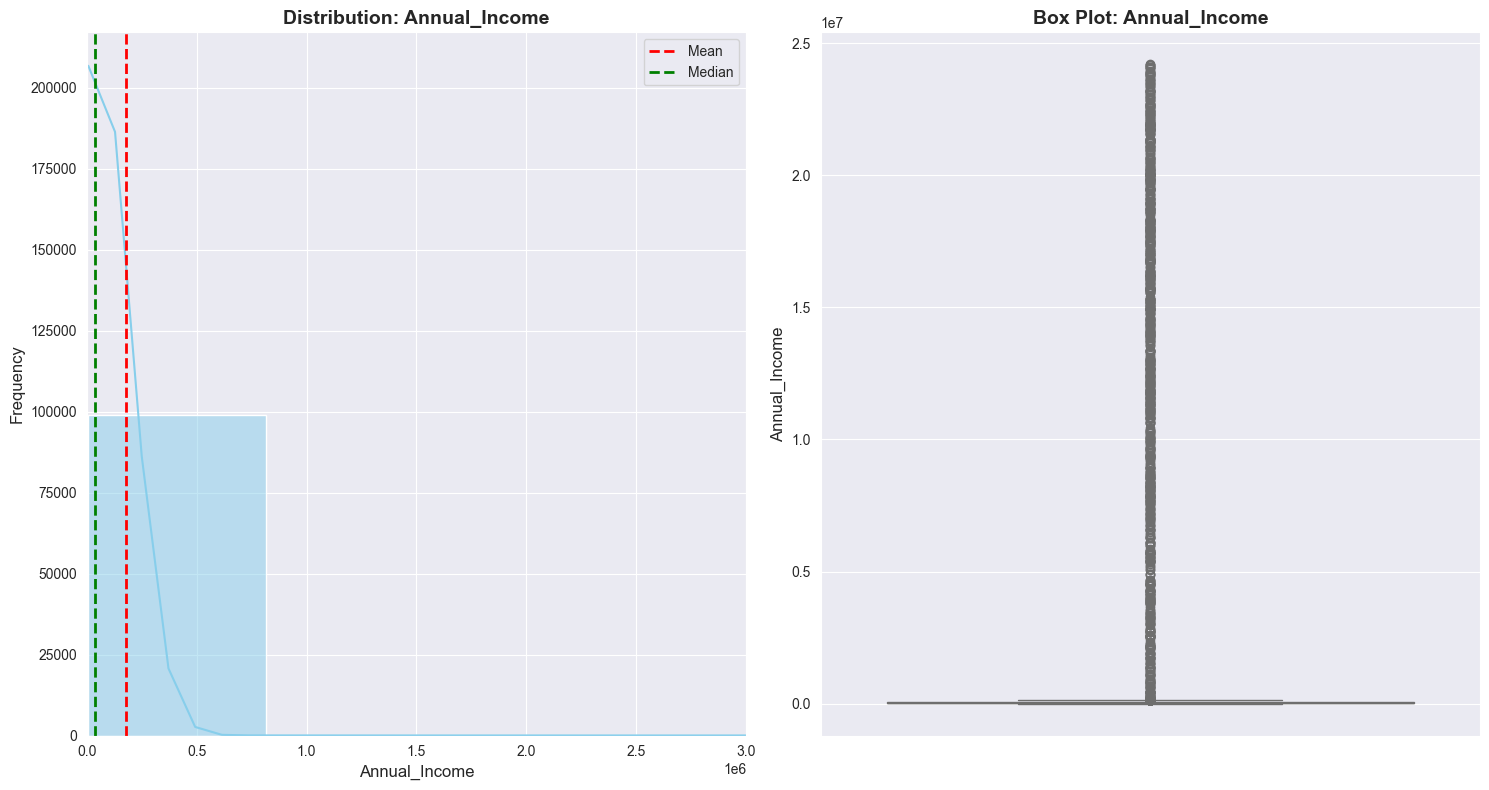

In [46]:
num_col(df_train, 'Annual_Income', xlim=(-10, 3e6))

In [47]:
details(df_train, 'Monthly_Inhand_Salary')

DType float64
Uniques: 13235
Missing values: 15002
Null percentage: 15.001999999999999
Total values 100000)


DType float64
Uniques: 13235
Missing values: 15002
Null percentage: 15.001999999999999
Total values 100000)

Statistics:
count    84998.000000
mean      4194.170850
std       3183.686167
min        303.645417
25%       1625.568229
50%       3093.745000
75%       5957.448333
max      15204.633333
Name: Monthly_Inhand_Salary, dtype: float64


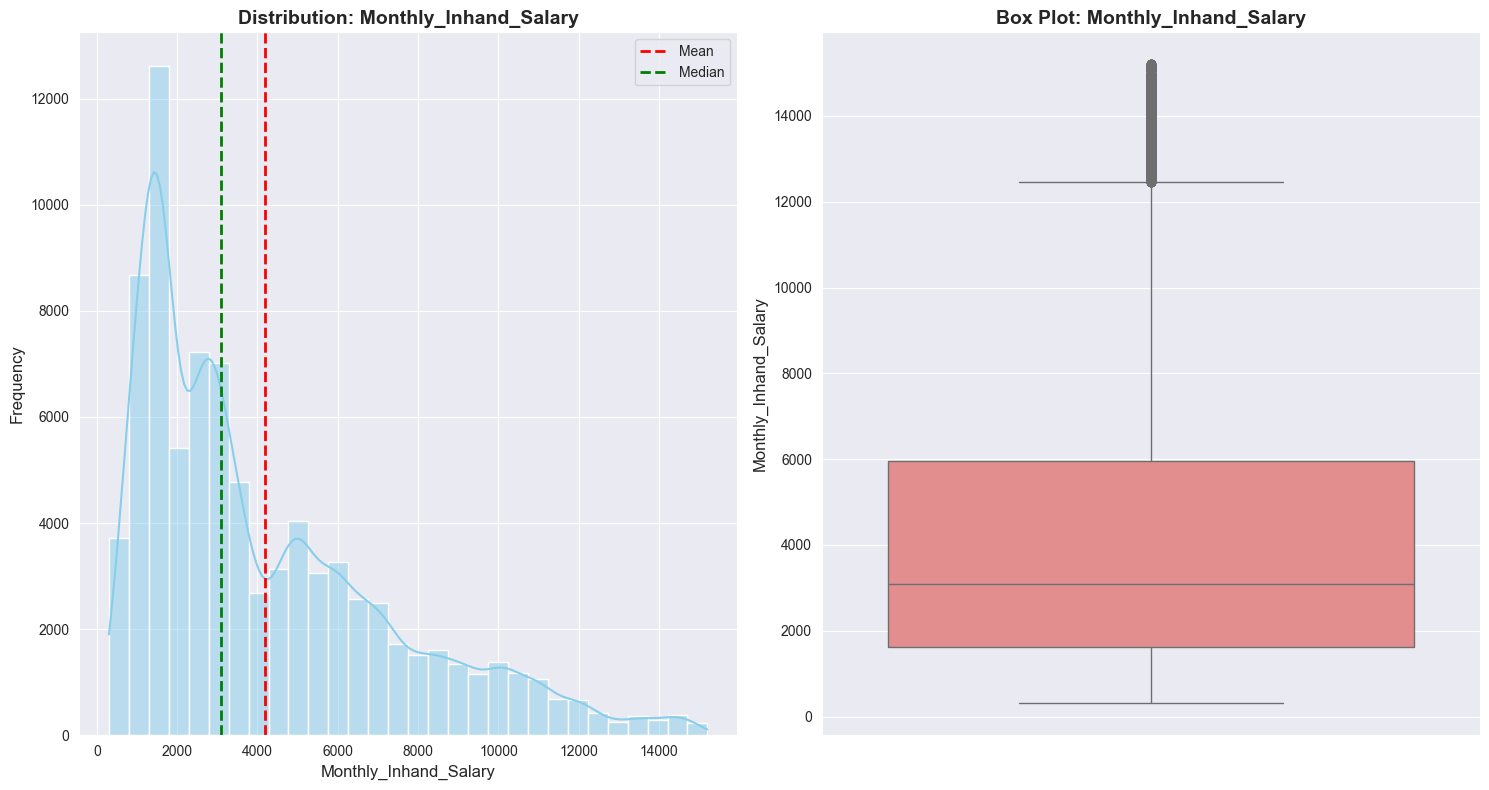

In [48]:
num_col(df_train, 'Monthly_Inhand_Salary')

In [49]:
df_train['Monthly_Inhand_Salary'] = df_train['Monthly_Inhand_Salary'].fillna(df_train['Monthly_Inhand_Salary'].median())

In [50]:
details(df_train, 'Monthly_Inhand_Salary')

DType float64
Uniques: 13235
Missing values: 0
Null percentage: 0.0
Total values 100000)


In [51]:
details(df_train, 'Num_Bank_Accounts', 5)

DType int64
Uniques: 943
Missing values: 0
Null percentage: 0.0
Total values 100000)
0    3
1    3
2    3
3    3
4    3
Name: Num_Bank_Accounts, dtype: int64


In [52]:
df_train['Num_Bank_Accounts'].unique()[:50]

array([   3,    2,    1,    7,    4,    0,    8,    5,    6,    9,   10,
       1414, 1231,   67,  572, 1488,   91,  528, 1647, 1696, 1338,  649,
        889, 1668,  685,  857,  975, 1496, 1534, 1620,   37, 1388, 1429,
       1332, 1588,  120, 1777, 1096,  803,  494,  744, 1139,  831, 1613,
        741,  121,  665, 1748, 1644,  823])

In [53]:
cat_col(df_train, 'Num_Bank_Accounts')

DType int64
Uniques: 943
Missing values: 0
Null percentage: 0.0
Total values 100000)
Too many unique values (943.


In [54]:
df_train['Num_Bank_Accounts'].value_counts()[:10]

Num_Bank_Accounts
6     13001
7     12823
8     12765
4     12186
5     12118
3     11950
9      5443
10     5247
1      4490
0      4328
Name: count, dtype: int64

In [55]:
def f(p):
    try:
        if 0 <= p <= 20:
            return int(p)
    except:
        return np.nan

df_train['Num_Bank_Accounts'] = df_train['Num_Bank_Accounts'].apply(f)

DType float64
Uniques: 13
Missing values: 1335
Null percentage: 1.335
Total values 100000)


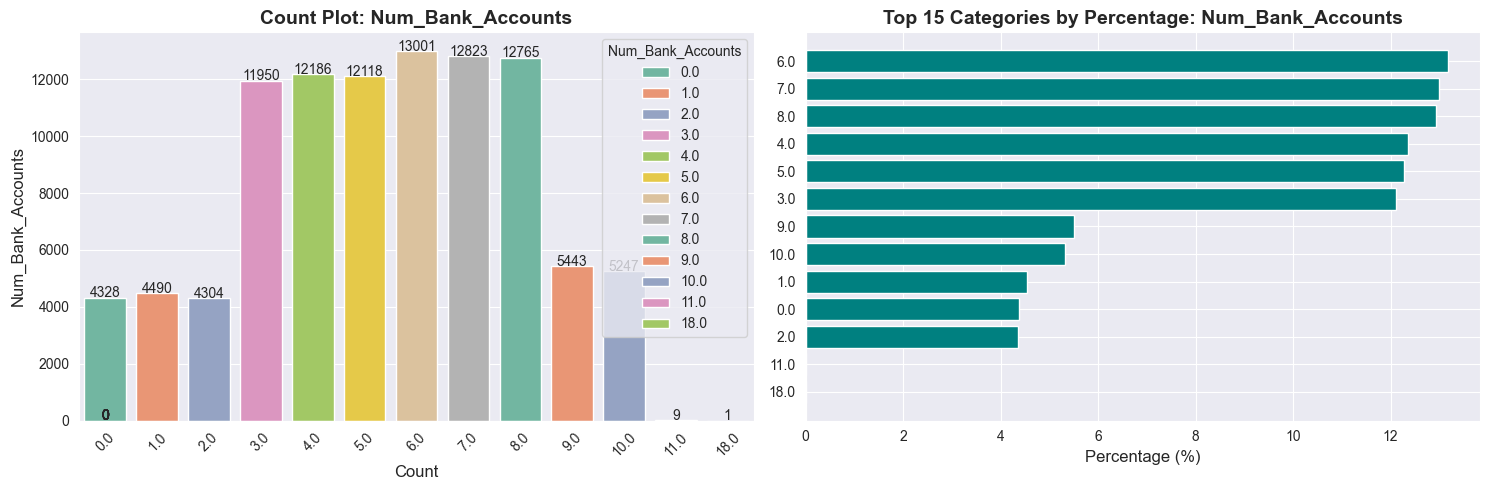

In [56]:
cat_col(df_train, 'Num_Bank_Accounts')

In [57]:
df_train['Num_Bank_Accounts'] = df_train['Num_Bank_Accounts'].fillna(df_train['Num_Bank_Accounts'].median())

In [58]:
details(df_train, 'Interest_Rate')

DType int64
Uniques: 1750
Missing values: 0
Null percentage: 0.0
Total values 100000)


In [59]:
def f(p):
    try:
        if 0 <= p <= 31:
            return int(p)
    except:
        return np.nan

df_train['Interest_Rate'] = df_train['Interest_Rate'].apply(f)

df_train['Interest_Rate'].value_counts()

Interest_Rate
8.0     5012
5.0     4979
6.0     4721
10.0    4540
12.0    4540
7.0     4494
9.0     4494
11.0    4428
18.0    4102
15.0    3992
20.0    3929
17.0    3813
16.0    3730
19.0    3630
3.0     2765
1.0     2683
4.0     2589
2.0     2465
13.0    2384
14.0    2229
22.0    1720
30.0    1690
24.0    1685
23.0    1683
29.0    1662
28.0    1616
27.0    1608
25.0    1566
21.0    1560
26.0    1489
31.0    1457
Name: count, dtype: int64

DType float64
Uniques: 31
Missing values: 6745
Null percentage: 6.744999999999999
Total values 100000)

Statistics:
count    93255.000000
mean        13.601201
std          7.887065
min          1.000000
25%          7.000000
50%         12.000000
75%         19.000000
max         31.000000
Name: Interest_Rate, dtype: float64


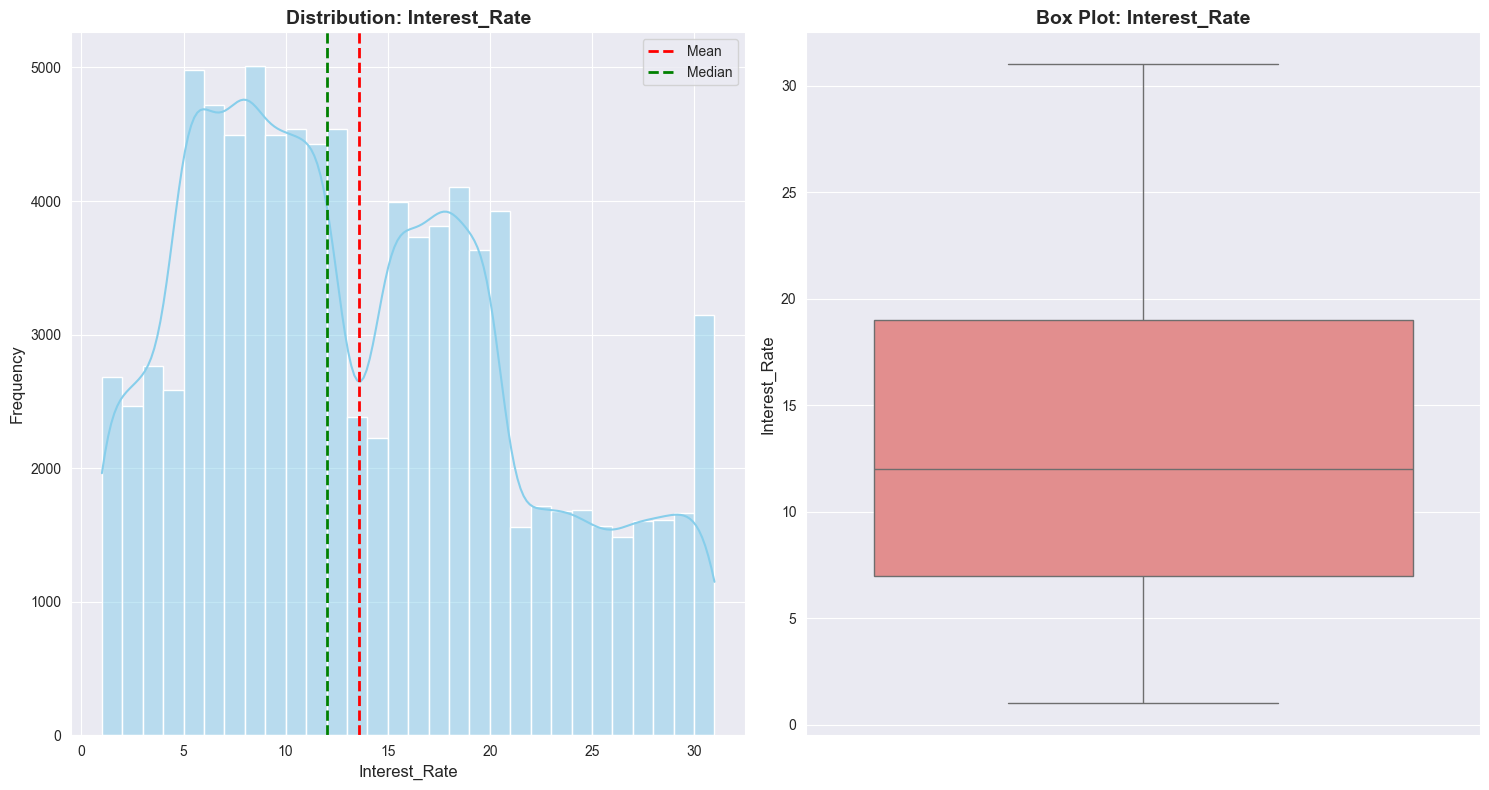

In [60]:
num_col(df_train, 'Interest_Rate')

In [61]:
df_train['Interest_Rate'] = df_train['Interest_Rate'].fillna(df_train['Interest_Rate'].median())

In [62]:
details(df_train, 'Num_of_Loan')

DType object
Uniques: 434
Missing values: 0
Null percentage: 0.0
Total values 100000)


In [63]:
df_train['Num_of_Loan'].value_counts()[:50]

Num_of_Loan
3       14386
2       14250
4       14016
0       10380
1       10083
6        7405
7        6930
5        6865
-100     3876
9        3542
8        3035
2_        782
4_        727
3_        718
0_        550
1_        523
7_        414
6_        398
5_        332
9_        160
8_        156
1150        4
430         3
1228        3
773         3
288         3
1480        3
217         2
955         2
911         2
58          2
23          2
1214        2
898         2
855         2
31          2
275         2
1236        2
33          2
95          2
1353        2
1354        2
1259        2
1463        2
1241        2
50          2
251         2
1181        2
1127        2
733         2
Name: count, dtype: int64

In [64]:
f = lambda p: p.replace('_', '') if isinstance(p, str) else np.nan

df_train['Num_of_Loan'] = df_train['Num_of_Loan'].apply(f)
df_train['Num_of_Loan'] = pd.to_numeric(df_train['Num_of_Loan'], errors='coerce')
df_train['Num_of_Loan']

0        4
1        4
2        4
3        4
4        4
        ..
99995    2
99996    2
99997    2
99998    2
99999    2
Name: Num_of_Loan, Length: 100000, dtype: int64

In [65]:
df_train['Type_of_Loan'].value_counts()

Type_of_Loan
Not Specified                                                                                        1408
Credit-Builder Loan                                                                                  1280
Personal Loan                                                                                        1272
Debt Consolidation Loan                                                                              1264
Student Loan                                                                                         1240
                                                                                                     ... 
Auto Loan, Payday Loan, Auto Loan, Student Loan, Student Loan, Student Loan, and Home Equity Loan       8
Home Equity Loan, Payday Loan, Not Specified, and Personal Loan                                         8
Home Equity Loan, Auto Loan, Auto Loan, and Auto Loan                                                   8
Payday Loan, Student Loan, Mortga

In [66]:
details(df_train, 'Type_of_Loan')

DType object
Uniques: 6260
Missing values: 11408
Null percentage: 11.408
Total values 100000)


In [67]:
df_train['Type_of_Loan'] = df_train['Type_of_Loan'].fillna('Unknown')

In [68]:
details(df_train, 'Type_of_Loan')

DType object
Uniques: 6261
Missing values: 0
Null percentage: 0.0
Total values 100000)


In [69]:
def parse_loans(loan_str):
    if pd.isna(loan_str):
        return ['Not Specified']
    loan_str = loan_str.replace(', and ', ', ').replace(' and ', ', ')
    return [x.strip() for x in loan_str.split(',')]

In [149]:
from sklearn.preprocessing import MultiLabelBinarizer


df_train['loan_list'] = df_train['Type_of_Loan'].apply(parse_loans)

mlb = MultiLabelBinarizer()
loan_dummies = pd.DataFrame(
    mlb.fit_transform(df_train['loan_list']),
    columns=mlb.classes_,
    index=df_train.index
)

df = pd.concat([df_train, loan_dummies], axis=1)
df.drop(columns=['loan_list'], inplace=True)

In [150]:
df_train.columns

Index(['Month', 'Age', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance', 'Credit_Score',
       'Auto Loan', 'Credit-Builder Loan', 'Debt Consolidation Loan',
       'Home Equity Loan', 'Mortgage Loan', 'Not Specified', 'Payday Loan',
       'Personal Loan', 'Student Loan', 'Unknown', 'Occupation_Accountant',
       'Occupation_Architect', 'Occupation_Developer', 'Occupation_Doctor',
       'Occupation_Engineer', 'Occupation_Entrepreneur',
       'Occupation_Journalist', 'Occupation_Lawyer', 'Occupation_Manager',
       'Occupation_Mechanic', 'Occupation_Media_Manager',
       'Occupation_Musicia

In [151]:
df_train.drop(columns=['Type_of_Loan'], inplace=True)

In [73]:
details(df_train, 'Delay_from_due_date')

DType int64
Uniques: 73
Missing values: 0
Null percentage: 0.0
Total values 100000)


DType int64
Uniques: 73
Missing values: 0
Null percentage: 0.0
Total values 100000)

Statistics:
count    100000.000000
mean         21.068780
std          14.860104
min          -5.000000
25%          10.000000
50%          18.000000
75%          28.000000
max          67.000000
Name: Delay_from_due_date, dtype: float64


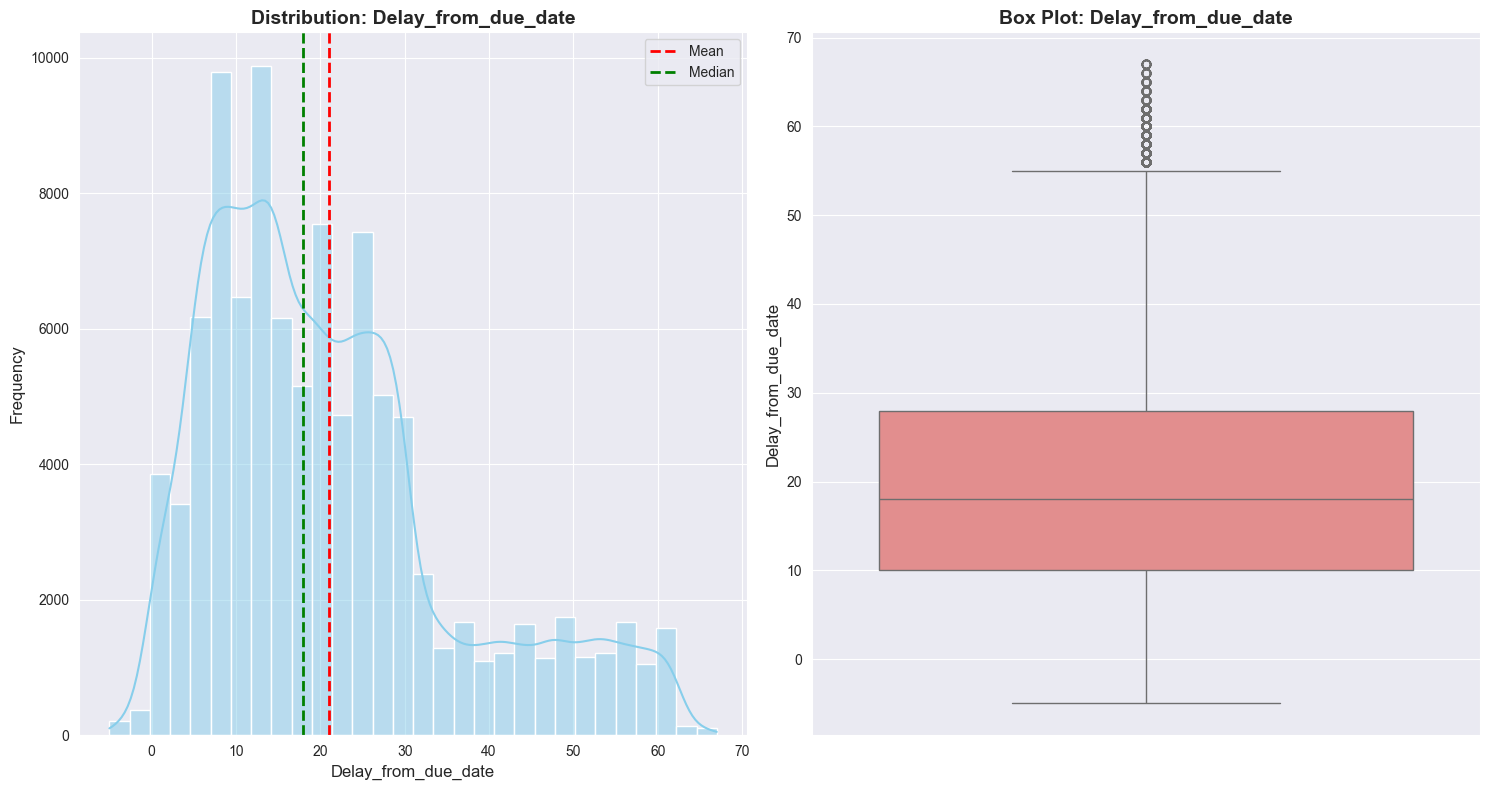

In [74]:
num_col(df_train, 'Delay_from_due_date')

In [75]:
details(df_train, 'Num_of_Delayed_Payment')

DType object
Uniques: 749
Missing values: 7002
Null percentage: 7.002
Total values 100000)


In [76]:
df_train['Num_of_Delayed_Payment'].value_counts()[:50]

Num_of_Delayed_Payment
19     5327
17     5261
16     5173
10     5153
18     5083
15     5077
20     4935
12     4905
9      4834
8      4706
11     4667
14     4066
13     3908
21     2497
7      2304
22     2257
6      2256
5      2036
23     1970
3      1862
4      1787
2      1751
24     1647
25     1607
1      1586
0      1568
26      318
-1      308
27      244
-2      223
8_      167
15_     160
10_     156
20_     154
12_     154
19_     154
17_     151
9_      147
11_     143
16_     139
18_     133
28      130
13_     128
14_     127
-3       91
22_      82
7_       81
3_       69
6_       65
2_       59
Name: count, dtype: int64

In [77]:
def clean_delayed_payments(val):
    if pd.isna(val):
        return np.nan
    val = str(val).strip().replace('_', '')
    if val == '' or val == '.':
        return np.nan
    try:
        val = float(val)
        if val < 0:
            return np.nan
        return val
    except ValueError as e:
        print(f"Failed to convert: repr={repr(val)}")
        return np.nan

df_train['Num_of_Delayed_Payment'] = df_train['Num_of_Delayed_Payment'].apply(clean_delayed_payments)
print(df['Num_of_Delayed_Payment'].isna().sum())

7002


In [78]:
df_train['Num_of_Delayed_Payment'] = pd.to_numeric(df_train['Num_of_Delayed_Payment'], errors='coerce')
df_train['Num_of_Delayed_Payment'].value_counts()

Num_of_Delayed_Payment
19.0      5481
17.0      5412
16.0      5312
10.0      5309
15.0      5237
          ... 
3336.0       1
3392.0       1
3688.0       1
221.0        1
1653.0       1
Name: count, Length: 708, dtype: int64

In [79]:
details(df_train, 'Num_of_Delayed_Payment')

DType float64
Uniques: 708
Missing values: 7646
Null percentage: 7.646
Total values 100000)


In [80]:
df_train['Num_of_Delayed_Payment'] = df_train['Num_of_Delayed_Payment'].fillna(df_train['Num_of_Delayed_Payment'].median())

In [81]:
df_train['Num_of_Delayed_Payment'].isnull().sum()

np.int64(0)

In [82]:
details(df_train, 'Changed_Credit_Limit')

DType object
Uniques: 4384
Missing values: 0
Null percentage: 0.0
Total values 100000)


In [83]:
df_train['Changed_Credit_Limit'].value_counts()

Changed_Credit_Limit
_                     2091
8.22                   133
11.5                   127
11.32                  126
7.35                   121
                      ... 
27.38                    1
21.17                    1
0.8199999999999998       1
30.91                    1
-6.2                     1
Name: count, Length: 4384, dtype: int64

In [84]:
df_train['Changed_Credit_Limit'] = df_train['Changed_Credit_Limit'].replace('_', np.nan)

In [85]:
df_train['Changed_Credit_Limit'].value_counts()

Changed_Credit_Limit
8.22                  133
11.5                  127
11.32                 126
10.06                 121
7.35                  121
                     ... 
3.1900000000000004      1
0.8199999999999998      1
30.91                   1
-6.2                    1
-3.05                   1
Name: count, Length: 4383, dtype: int64

In [86]:
df_train['Changed_Credit_Limit'] = pd.to_numeric(df_train['Changed_Credit_Limit'], errors='coerce')

In [87]:
df_train['Changed_Credit_Limit'] = df_train['Changed_Credit_Limit'].fillna(df_train['Changed_Credit_Limit'].median())

In [88]:
details(df_train, 'Num_Credit_Inquiries')

DType float64
Uniques: 1223
Missing values: 1965
Null percentage: 1.965
Total values 100000)


In [89]:
df_train['Num_Credit_Inquiries'].describe()

count    98035.000000
mean        27.754251
std        193.177339
min          0.000000
25%          3.000000
50%          6.000000
75%          9.000000
max       2597.000000
Name: Num_Credit_Inquiries, dtype: float64

In [90]:
df_train = df_train.dropna(subset=['Num_Credit_Inquiries'])

In [91]:
details(df_train, 'Credit_Mix')

DType object
Uniques: 4
Missing values: 0
Null percentage: 0.0
Total values 98035)


In [92]:
df_train['Credit_Mix'].unique()

array(['_', 'Good', 'Standard', 'Bad'], dtype=object)

In [93]:
df_train['Credit_Mix'] = df_train['Credit_Mix'].replace('_', np.nan)

In [94]:
details(df_train, 'Credit_Mix')

DType object
Uniques: 3
Missing values: 19799
Null percentage: 20.195848421482125
Total values 98035)


DType object
Uniques: 3
Missing values: 19799
Null percentage: 20.195848421482125
Total values 98035)


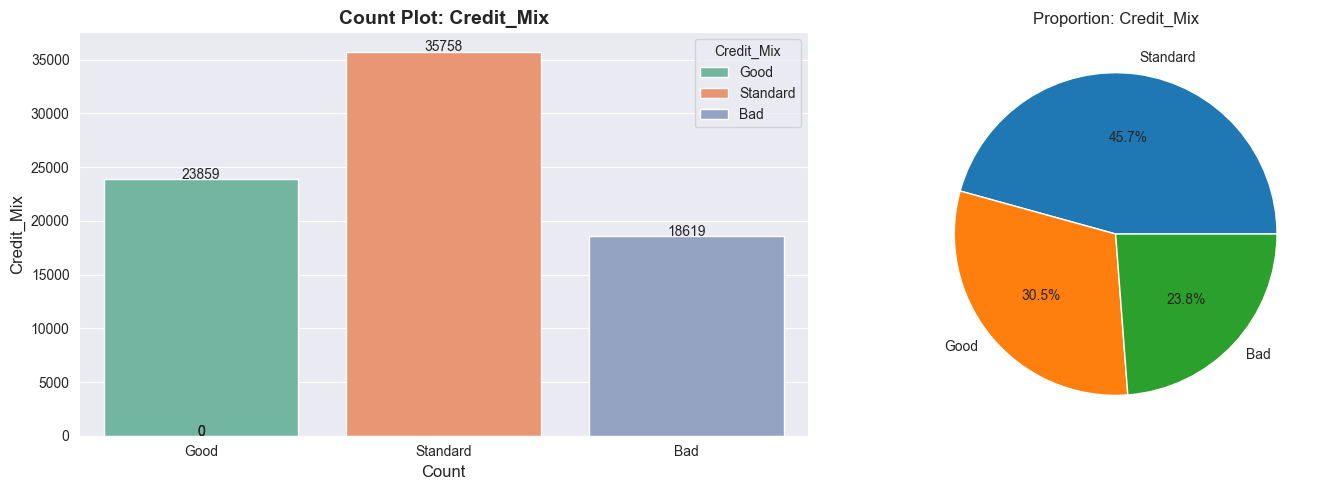

In [95]:
cat_col(df_train, 'Credit_Mix')

In [96]:
df_train['Credit_Mix'] = df_train['Credit_Mix'].fillna('Unknown')

In [97]:
details(df_train, 'Outstanding_Debt')

DType object
Uniques: 13156
Missing values: 0
Null percentage: 0.0
Total values 98035)


In [98]:
df_train['Outstanding_Debt'].value_counts()

Outstanding_Debt
460.46     23
1151.7     23
1109.03    22
1360.45    22
1334.09    16
           ..
502.35_     1
807.65_     1
554.82_     1
695.45_     1
518.86_     1
Name: count, Length: 13156, dtype: int64

In [99]:
df_train['Outstanding_Debt'] = pd.to_numeric(df['Outstanding_Debt'], errors='coerce')

In [100]:
df_train['Outstanding_Debt'] = df_train['Outstanding_Debt'].fillna(df_train['Outstanding_Debt'].median())

In [101]:
details(df_train, 'Credit_Utilization_Ratio')

DType float64
Uniques: 98035
Missing values: 0
Null percentage: 0.0
Total values 98035)


In [102]:
df_train['Credit_Utilization_Ratio'].value_counts()

Credit_Utilization_Ratio
26.822620    1
31.944960    1
28.609352    1
31.377862    1
24.797347    1
            ..
34.663572    1
40.565631    1
41.255522    1
33.638208    1
34.192463    1
Name: count, Length: 98035, dtype: int64

In [103]:
details(df_train, 'Credit_History_Age')

DType object
Uniques: 404
Missing values: 8852
Null percentage: 9.029428265415412
Total values 98035)


In [104]:
df_train['Credit_History_Age'].head()

0    22 Years and 1 Months
1                      NaN
2    22 Years and 3 Months
3    22 Years and 4 Months
4    22 Years and 5 Months
Name: Credit_History_Age, dtype: object

In [167]:
def parse_credit_history_age(val):
    if pd.isna(val):
        return np.nan
    try:
        parts = str(val).strip()
        years = int(re.search(r'(\d+)\s+Year', parts).group(1))
        months = int(re.search(r'(\d+)\s+Month', parts).group(1))
        return years * 12 + months
    except:
        return np.nan

import re
df_train['Credit_History_Age'] = df_train['Credit_History_Age'].apply(parse_credit_history_age)



In [168]:
df_train['Credit_History_Age'].head()

0    265.0
1      NaN
2    267.0
3    268.0
4    269.0
Name: Credit_History_Age, dtype: float64

In [169]:
details(df_train, 'Credit_History_Age')

DType float64
Uniques: 404
Missing values: 9030
Null percentage: 9.030000000000001
Total values 100000)


In [170]:
df_train['Credit_History_Age'] = df_train['Credit_History_Age'].fillna(df_train['Credit_History_Age'].median())

In [171]:
details(df_train, 'Payment_of_Min_Amount')

DType float64
Uniques: 3
Missing values: 0
Null percentage: 0.0
Total values 100000)


DType float64
Uniques: 3
Missing values: 0
Null percentage: 0.0
Total values 100000)


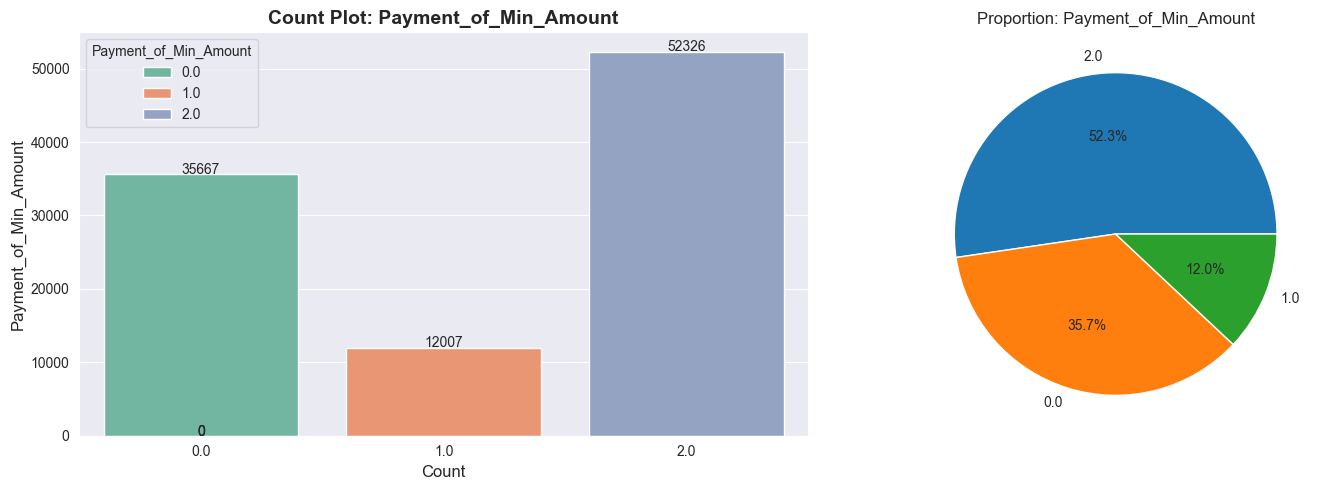

In [172]:
cat_col(df_train, 'Payment_of_Min_Amount')

In [173]:
details(df_train, 'Total_EMI_per_month')

DType float64
Uniques: 14950
Missing values: 0
Null percentage: 0.0
Total values 100000)


DType float64
Uniques: 14950
Missing values: 0
Null percentage: 0.0
Total values 100000)

Statistics:
count    100000.000000
mean       1403.118217
std        8306.041270
min           0.000000
25%          30.306660
50%          69.249473
75%         161.224249
max       82331.000000
Name: Total_EMI_per_month, dtype: float64


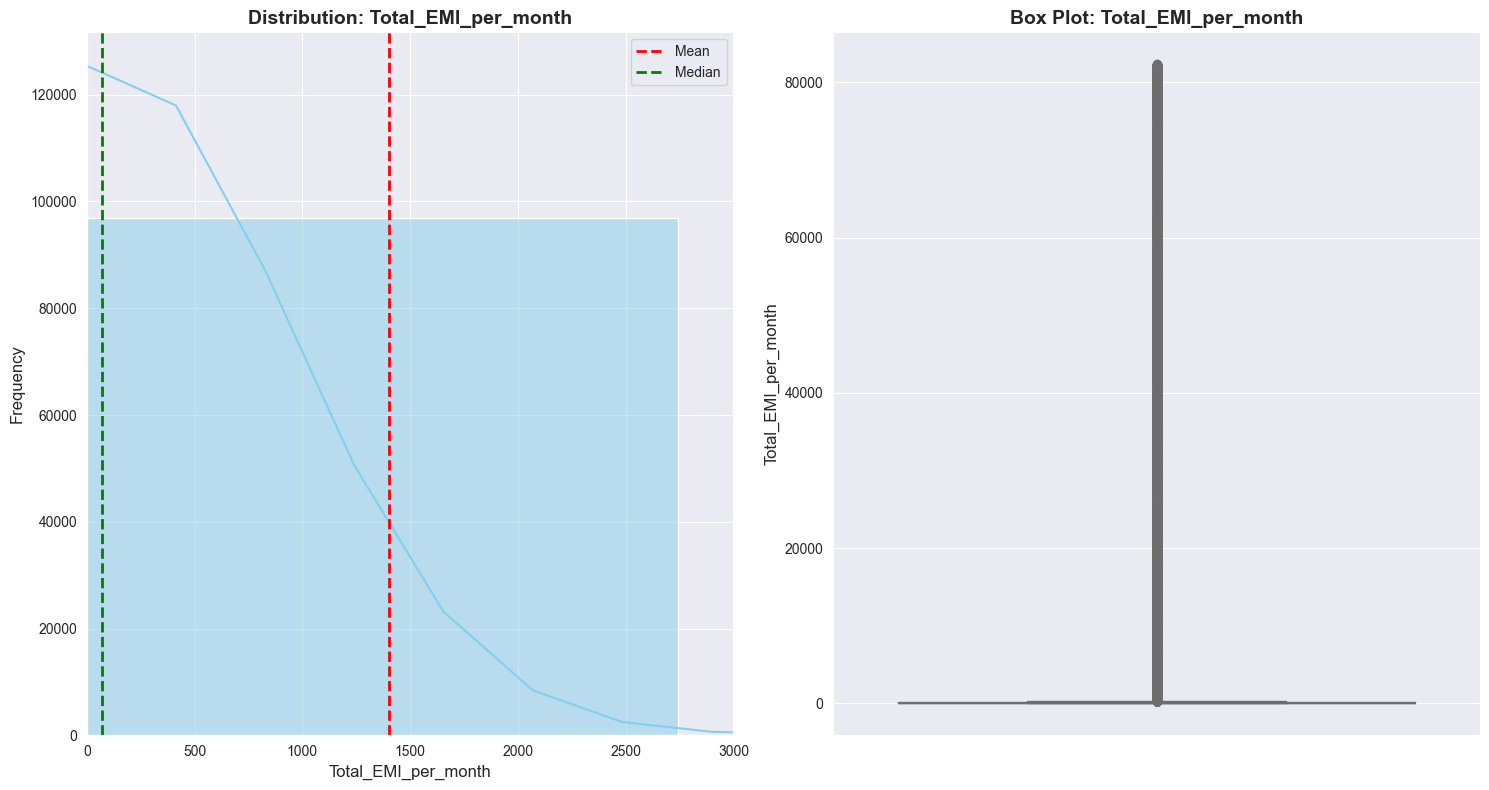

In [174]:
num_col(df_train, 'Total_EMI_per_month', xlim=(0, 3000))

In [175]:
details(df_train, 'Amount_invested_monthly')

DType float64
Uniques: 91049
Missing values: 0
Null percentage: 0.0
Total values 100000)


In [176]:
df_train = df_train.dropna(subset=['Amount_invested_monthly'])

In [177]:
df_train['Amount_invested_monthly'].head()

0     80.415295
1    118.280222
2     81.699521
3    199.458074
4     41.420153
Name: Amount_invested_monthly, dtype: float64

In [178]:
df_train['Amount_invested_monthly'].isnull().sum()

np.int64(0)

In [179]:
df_train['Amount_invested_monthly'] = pd.to_numeric(df_train['Amount_invested_monthly'], errors='coerce')

In [180]:
df_train['Amount_invested_monthly'].head()

0     80.415295
1    118.280222
2     81.699521
3    199.458074
4     41.420153
Name: Amount_invested_monthly, dtype: float64

In [181]:
details(df_train, 'Payment_Behaviour')

KeyError: 'Payment_Behaviour'

In [182]:
cat_col(df_train, 'Payment_Behaviour')

KeyError: 'Payment_Behaviour'

In [121]:
df_train['Payment_Behaviour'] = df_train['Payment_Behaviour'].replace('!@9#%8', np.nan)

In [183]:
cat_col(df_train, 'Payment_Behaviour')

KeyError: 'Payment_Behaviour'

In [123]:
df_train['Payment_Behaviour'] = df_train['Payment_Behaviour'].fillna('Unknown')

In [184]:
df_train['Payment_Behaviour'].isnull().sum()

KeyError: 'Payment_Behaviour'

In [185]:
details(df_train, 'Monthly_Balance')

DType float64
Uniques: 98791
Missing values: 0
Null percentage: 0.0
Total values 100000)


In [186]:
df_train = df_train.dropna(subset=['Monthly_Balance'])

In [187]:
df_train['Monthly_Balance'] = pd.to_numeric(df_train['Monthly_Balance'], errors='coerce')

In [188]:
df_train.head()

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan,Unknown,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Occupation________,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,1,23.000000,19114.12,1824.843333,3.0,4,3.0,4,3,7.0,11.27,4.0,0.0,809.98,26.822620,265.0,0.0,49.574949,80.415295,312.494089,2,1,1,0,1,0,0,0,1,0,0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False
1,2,23.000000,19114.12,3093.745000,3.0,4,3.0,4,-1,14.0,11.27,4.0,3.0,809.98,31.944960,219.0,0.0,49.574949,118.280222,284.629162,2,1,1,0,1,0,0,0,1,0,0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False
2,3,33.323274,19114.12,3093.745000,3.0,4,3.0,4,3,7.0,9.40,4.0,3.0,809.98,28.609352,267.0,0.0,49.574949,81.699521,331.209863,2,1,1,0,1,0,0,0,1,0,0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False
3,4,23.000000,19114.12,3093.745000,3.0,4,3.0,4,5,4.0,6.27,4.0,3.0,809.98,31.377862,268.0,0.0,49.574949,199.458074,223.451310,2,1,1,0,1,0,0,0,1,0,0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True
4,5,23.000000,19114.12,1824.843333,3.0,4,3.0,4,6,14.0,11.27,4.0,3.0,809.98,24.797347,269.0,0.0,49.574949,41.420153,341.489231,2,1,1,0,1,0,0,0,1,0,0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False


In [189]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 53 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   Month                                               100000 non-null  int32  
 1   Age                                                 100000 non-null  float64
 2   Annual_Income                                       100000 non-null  float64
 3   Monthly_Inhand_Salary                               100000 non-null  float64
 4   Num_Bank_Accounts                                   100000 non-null  float64
 5   Num_Credit_Card                                     100000 non-null  int64  
 6   Interest_Rate                                       100000 non-null  float64
 7   Num_of_Loan                                         100000 non-null  int64  
 8   Delay_from_due_date                                 100000 non-nu

Model

In [190]:
df_train.head()

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan,Unknown,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Occupation________,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,1,23.000000,19114.12,1824.843333,3.0,4,3.0,4,3,7.0,11.27,4.0,0.0,809.98,26.822620,265.0,0.0,49.574949,80.415295,312.494089,2,1,1,0,1,0,0,0,1,0,0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False
1,2,23.000000,19114.12,3093.745000,3.0,4,3.0,4,-1,14.0,11.27,4.0,3.0,809.98,31.944960,219.0,0.0,49.574949,118.280222,284.629162,2,1,1,0,1,0,0,0,1,0,0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False
2,3,33.323274,19114.12,3093.745000,3.0,4,3.0,4,3,7.0,9.40,4.0,3.0,809.98,28.609352,267.0,0.0,49.574949,81.699521,331.209863,2,1,1,0,1,0,0,0,1,0,0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False
3,4,23.000000,19114.12,3093.745000,3.0,4,3.0,4,5,4.0,6.27,4.0,3.0,809.98,31.377862,268.0,0.0,49.574949,199.458074,223.451310,2,1,1,0,1,0,0,0,1,0,0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True
4,5,23.000000,19114.12,1824.843333,3.0,4,3.0,4,6,14.0,11.27,4.0,3.0,809.98,24.797347,269.0,0.0,49.574949,41.420153,341.489231,2,1,1,0,1,0,0,0,1,0,0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False


In [191]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 53 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   Month                                               100000 non-null  int32  
 1   Age                                                 100000 non-null  float64
 2   Annual_Income                                       100000 non-null  float64
 3   Monthly_Inhand_Salary                               100000 non-null  float64
 4   Num_Bank_Accounts                                   100000 non-null  float64
 5   Num_Credit_Card                                     100000 non-null  int64  
 6   Interest_Rate                                       100000 non-null  float64
 7   Num_of_Loan                                         100000 non-null  int64  
 8   Delay_from_due_date                                 100000 non-nu

In [192]:
df_train['Occupation'].head()

KeyError: 'Occupation'

In [133]:
df_train['Occupation'].unique()

array(['Scientist', '_______', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

In [134]:
df_train = pd.get_dummies(df, columns=['Occupation'])

In [135]:
df_train.head()

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan,Unknown,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Occupation________
0,1,23.000000,19114.12,1824.843333,3.0,4,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good,1,1,0,1,0,0,0,1,0,0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,2,23.000000,19114.12,3093.745000,3.0,4,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good,1,1,0,1,0,0,0,1,0,0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,3,33.323274,19114.12,3093.745000,3.0,4,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good,1,1,0,1,0,0,0,1,0,0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,4,23.000000,19114.12,3093.745000,3.0,4,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good,1,1,0,1,0,0,0,1,0,0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
4,5,23.000000,19114.12,1824.843333,3.0,4,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good,1,1,0,1,0,0,0,1,0,0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [136]:
df_train['Credit_Mix'].unique()

array(['_', 'Good', 'Standard', 'Bad'], dtype=object)

In [137]:
oe = OrdinalEncoder(categories=[['_', 'Bad', 'Standard', 'Good']])
df_train[['Credit_Mix']] = oe.fit_transform(df_train[['Credit_Mix']])

In [138]:
df_train['Payment_of_Min_Amount'].unique()

array(['No', 'NM', 'Yes'], dtype=object)

In [139]:
df_train['Payment_of_Min_Amount'] = df_train['Payment_of_Min_Amount'].replace('NM', 'Unknown')

In [140]:
oe2 = OrdinalEncoder(categories=[['No', 'Unknown', 'Yes']])
df_train[['Payment_of_Min_Amount']] = oe2.fit_transform(df_train[['Payment_of_Min_Amount']])

In [141]:
df_train['Payment_Behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments', '!@9#%8',
       'High_spent_Large_value_payments'], dtype=object)

In [142]:
df_train = pd.get_dummies(df_train, columns=['Payment_Behaviour'])

In [143]:
df_train.shape

(100000, 55)

In [144]:
df_train['Credit_Score'].unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

In [145]:
credit_score_map = {'Poor': 0, 'Standard': 1, 'Good': 2}
df_train['Credit_Score'] = df_train['Credit_Score'].map(credit_score_map)

In [146]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 55 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   Month                                               100000 non-null  int32  
 1   Age                                                 100000 non-null  float64
 2   Annual_Income                                       100000 non-null  float64
 3   Monthly_Inhand_Salary                               100000 non-null  float64
 4   Num_Bank_Accounts                                   100000 non-null  float64
 5   Num_Credit_Card                                     100000 non-null  int64  
 6   Interest_Rate                                       100000 non-null  float64
 7   Num_of_Loan                                         100000 non-null  int64  
 8   Type_of_Loan                                        100000 non-nu

In [147]:
df_train.head()

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan,Unknown,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Occupation________,Payment_Behaviour_!@9#%8,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,1,23.000000,19114.12,1824.843333,3.0,4,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,0.0,809.98,26.822620,22 Years and 1 Months,0.0,49.574949,80.41529543900253,312.49408867943663,2,1,1,0,1,0,0,0,1,0,0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False
1,2,23.000000,19114.12,3093.745000,3.0,4,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,3.0,809.98,31.944960,NaN,0.0,49.574949,118.28022162236736,284.62916249607184,2,1,1,0,1,0,0,0,1,0,0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False
2,3,33.323274,19114.12,3093.745000,3.0,4,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,3.0,809.98,28.609352,22 Years and 3 Months,0.0,49.574949,81.699521264648,331.2098628537912,2,1,1,0,1,0,0,0,1,0,0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False
3,4,23.000000,19114.12,3093.745000,3.0,4,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,3.0,809.98,31.377862,22 Years and 4 Months,0.0,49.574949,199.4580743910713,223.45130972736786,2,1,1,0,1,0,0,0,1,0,0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True
4,5,23.000000,19114.12,1824.843333,3.0,4,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,3.0,809.98,24.797347,22 Years and 5 Months,0.0,49.574949,41.420153086217326,341.48923103222177,2,1,1,0,1,0,0,0,1,0,0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False


In [152]:
mlb = MultiLabelBinarizer()
loan_encoded = pd.DataFrame(
    mlb.fit_transform(df_train['loan_list']),
    columns=mlb.classes_,
    index=df.index
)

df_train = df_train.drop(columns=['loan_list'])
df_train = pd.concat([df_train, loan_encoded], axis=1)

In [153]:
df_train.shape

(100000, 64)

In [154]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 64 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   Month                                               100000 non-null  int32  
 1   Age                                                 100000 non-null  float64
 2   Annual_Income                                       100000 non-null  float64
 3   Monthly_Inhand_Salary                               100000 non-null  float64
 4   Num_Bank_Accounts                                   100000 non-null  float64
 5   Num_Credit_Card                                     100000 non-null  int64  
 6   Interest_Rate                                       100000 non-null  float64
 7   Num_of_Loan                                         100000 non-null  int64  
 8   Delay_from_due_date                                 100000 non-nu

In [155]:
df_train = df_train.loc[:, ~df_train.columns.duplicated()]

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 54 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   Month                                               100000 non-null  int32  
 1   Age                                                 100000 non-null  float64
 2   Annual_Income                                       100000 non-null  float64
 3   Monthly_Inhand_Salary                               100000 non-null  float64
 4   Num_Bank_Accounts                                   100000 non-null  float64
 5   Num_Credit_Card                                     100000 non-null  int64  
 6   Interest_Rate                                       100000 non-null  float64
 7   Num_of_Loan                                         100000 non-null  int64  
 8   Delay_from_due_date                                 100000 non-nu

In [156]:
cols_to_numeric = ['Num_of_Delayed_Payment', 'Changed_Credit_Limit',
                   'Outstanding_Debt', 'Amount_invested_monthly', 'Monthly_Balance']

for col in cols_to_numeric:
    df_train[col] = pd.to_numeric(df_train[col], errors='coerce')

In [157]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 54 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   Month                                               100000 non-null  int32  
 1   Age                                                 100000 non-null  float64
 2   Annual_Income                                       100000 non-null  float64
 3   Monthly_Inhand_Salary                               100000 non-null  float64
 4   Num_Bank_Accounts                                   100000 non-null  float64
 5   Num_Credit_Card                                     100000 non-null  int64  
 6   Interest_Rate                                       100000 non-null  float64
 7   Num_of_Loan                                         100000 non-null  int64  
 8   Delay_from_due_date                                 100000 non-nu

In [158]:
df_train['Credit_History_Age']

0         22 Years and 1 Months
1                           NaN
2         22 Years and 3 Months
3         22 Years and 4 Months
4         22 Years and 5 Months
                  ...          
99995     31 Years and 6 Months
99996     31 Years and 7 Months
99997     31 Years and 8 Months
99998     31 Years and 9 Months
99999    31 Years and 10 Months
Name: Credit_History_Age, Length: 100000, dtype: object

In [159]:
df_train.drop(columns=['Payment_Behaviour_!@9#%8'], inplace=True)

In [160]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 53 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   Month                                               100000 non-null  int32  
 1   Age                                                 100000 non-null  float64
 2   Annual_Income                                       100000 non-null  float64
 3   Monthly_Inhand_Salary                               100000 non-null  float64
 4   Num_Bank_Accounts                                   100000 non-null  float64
 5   Num_Credit_Card                                     100000 non-null  int64  
 6   Interest_Rate                                       100000 non-null  float64
 7   Num_of_Loan                                         100000 non-null  int64  
 8   Delay_from_due_date                                 100000 non-nu

In [161]:
cols_to_fill = ['Num_of_Delayed_Payment', 'Changed_Credit_Limit',
                'Num_Credit_Inquiries', 'Outstanding_Debt',
                'Amount_invested_monthly', 'Monthly_Balance']

for col in cols_to_fill:
    df_train[col] = pd.to_numeric(df_train[col], errors='coerce')
    df_train[col] = df_train[col].fillna(df_train[col].median())

In [162]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 53 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   Month                                               100000 non-null  int32  
 1   Age                                                 100000 non-null  float64
 2   Annual_Income                                       100000 non-null  float64
 3   Monthly_Inhand_Salary                               100000 non-null  float64
 4   Num_Bank_Accounts                                   100000 non-null  float64
 5   Num_Credit_Card                                     100000 non-null  int64  
 6   Interest_Rate                                       100000 non-null  float64
 7   Num_of_Loan                                         100000 non-null  int64  
 8   Delay_from_due_date                                 100000 non-nu

In [195]:
df_train.head()

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan,Unknown,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Occupation________,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,1,23.000000,19114.12,1824.843333,3.0,4,3.0,4,3,7.0,11.27,4.0,0.0,809.98,26.822620,265.0,0.0,49.574949,80.415295,312.494089,2,1,1,0,1,0,0,0,1,0,0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False
1,2,23.000000,19114.12,3093.745000,3.0,4,3.0,4,-1,14.0,11.27,4.0,3.0,809.98,31.944960,219.0,0.0,49.574949,118.280222,284.629162,2,1,1,0,1,0,0,0,1,0,0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False
2,3,33.323274,19114.12,3093.745000,3.0,4,3.0,4,3,7.0,9.40,4.0,3.0,809.98,28.609352,267.0,0.0,49.574949,81.699521,331.209863,2,1,1,0,1,0,0,0,1,0,0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False
3,4,23.000000,19114.12,3093.745000,3.0,4,3.0,4,5,4.0,6.27,4.0,3.0,809.98,31.377862,268.0,0.0,49.574949,199.458074,223.451310,2,1,1,0,1,0,0,0,1,0,0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True
4,5,23.000000,19114.12,1824.843333,3.0,4,3.0,4,6,14.0,11.27,4.0,3.0,809.98,24.797347,269.0,0.0,49.574949,41.420153,341.489231,2,1,1,0,1,0,0,0,1,0,0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False


In [196]:
X = df_train.drop(columns=['Credit_Score'])
y = df_train['Credit_Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(80000, 52) (20000, 52)
(80000,) (20000,)


In [197]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [198]:
X_train

array([[ 0.21683354, -1.25515854, -0.05325113, ..., -0.34130922,
        -0.4027609 , -0.58337412],
       [-0.21965984, -0.78458053, -0.04531048, ..., -0.34130922,
        -0.4027609 , -0.58337412],
       [ 1.0898203 ,  1.47419395, -0.10393503, ..., -0.34130922,
        -0.4027609 ,  1.71416586],
       ...,
       [ 0.21683354,  0.43892231, -0.07713546, ..., -0.34130922,
         2.48286263, -0.58337412],
       [ 0.21683354,  2.03888757, -0.10994957, ...,  2.9298945 ,
        -0.4027609 , -0.58337412],
       [-0.21965984, -0.0316557 , -0.1101098 , ..., -0.34130922,
        -0.4027609 ,  1.71416586]], shape=(80000, 52))

Logistic Regression

In [199]:
lr = LogisticRegression(multi_class='multinomial', max_iter=10000, random_state=42)

lr.fit(X_train, y_train)

D:\code\cpp\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,10000
,multi_class,'multinomial'


In [200]:
y_pred = lr.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.61925

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.48      0.56      5874
           1       0.63      0.77      0.69     10599
           2       0.51      0.40      0.45      3527

    accuracy                           0.62     20000
   macro avg       0.60      0.55      0.57     20000
weighted avg       0.62      0.62      0.61     20000


Confusion Matrix:
 [[2832 2769  273]
 [1394 8158 1047]
 [  50 2082 1395]]


Random Forest

In [201]:
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
)

rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [202]:
y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7974

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80      5874
           1       0.81      0.82      0.82     10599
           2       0.75      0.72      0.74      3527

    accuracy                           0.80     20000
   macro avg       0.79      0.78      0.78     20000
weighted avg       0.80      0.80      0.80     20000


Confusion Matrix:
 [[4709 1050  115]
 [1182 8703  714]
 [  18  973 2536]]


Decision Tree

In [203]:
dt = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [204]:
y_pred = dt.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6814

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.59      0.65      5874
           1       0.70      0.78      0.74     10599
           2       0.57      0.52      0.55      3527

    accuracy                           0.68     20000
   macro avg       0.66      0.63      0.64     20000
weighted avg       0.68      0.68      0.68     20000


Confusion Matrix:
 [[3492 2067  315]
 [1248 8286 1065]
 [ 115 1562 1850]]


KNN

In [205]:
knn = KNeighborsClassifier(
    n_neighbors=5,
    metric='euclidean',
    weights='uniform',
)

knn.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'euclidean'
,metric_params,None
,n_jobs,None


In [206]:
y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.65285

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.63      0.64      5874
           1       0.68      0.75      0.71     10599
           2       0.56      0.39      0.46      3527

    accuracy                           0.65     20000
   macro avg       0.63      0.59      0.60     20000
weighted avg       0.65      0.65      0.65     20000


Confusion Matrix:
 [[3700 1957  217]
 [1748 7995  856]
 [ 313 1852 1362]]


XGBoost

In [207]:
xgb = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42,
    n_jobs=-1
)

xgb.fit(X_train, y_train)

D:\code\cpp\.venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [22:46:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'mlogloss'


In [208]:
y_pred = xgb.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.72135

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.67      0.70      5874
           1       0.75      0.77      0.76     10599
           2       0.62      0.67      0.64      3527

    accuracy                           0.72     20000
   macro avg       0.70      0.70      0.70     20000
weighted avg       0.72      0.72      0.72     20000


Confusion Matrix:
 [[3917 1647  310]
 [1292 8142 1165]
 [  50 1109 2368]]


In [209]:
results = {
    'Logistic Regression': accuracy_score(y_test, lr.predict(X_test)),
    'Decision Tree':       accuracy_score(y_test, dt.predict(X_test)),
    'Random Forest':       accuracy_score(y_test, rf.predict(X_test)),
    'KNN':                 accuracy_score(y_test, knn.predict(X_test)),
    'XGBoost':             accuracy_score(y_test, xgb.predict(X_test)),
}

for model, acc in sorted(results.items(), key=lambda x: x[1], reverse=True):
    print(f"{model:}: {acc:}")

Random Forest: 0.7974
XGBoost: 0.72135
Decision Tree: 0.6814
KNN: 0.65285
Logistic Regression: 0.61925


In [212]:
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': [5, 10, 20, 30],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2']
}

random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=20,
    cv=3,
    scoring='accuracy',
    random_state=42,
    verbose=2,
    n_jobs=-1
)

random_search.fit(X_train, y_train)
print("Best parameters:", random_search.best_params_)
print("Best accuracy:", random_search.best_score_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 221}
Best accuracy: 0.7717749732095948


In [213]:
best_rf = RandomForestClassifier(
    **random_search.best_params_,
    random_state=42,
)

best_rf.fit(X_train, y_train)

,n_estimators,221
,criterion,'gini'
,max_depth,30
,min_samples_split,8
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


                 feature  importance
13      Outstanding_Debt    0.114899
6          Interest_Rate    0.074587
12            Credit_Mix    0.066610
8    Delay_from_due_date    0.064405
10  Changed_Credit_Limit    0.053244
5        Num_Credit_Card    0.047098
15    Credit_History_Age    0.046447
11  Num_Credit_Inquiries    0.043063
2          Annual_Income    0.038083
17   Total_EMI_per_month    0.036203


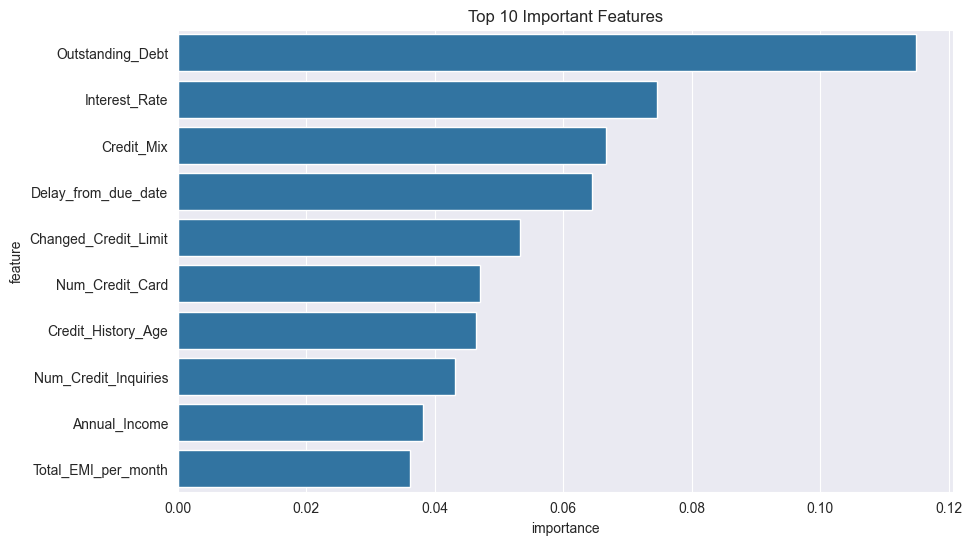

In [214]:
importances = pd.DataFrame({
    'feature': X.columns,
    'importance': best_rf.feature_importances_
}).sort_values('importance', ascending=False)

print(importances.head(10))

plt.figure(figsize=(10, 6))
sns.barplot(data=importances.head(10), x='importance', y='feature')
plt.title('Top 10 Important Features')
plt.show()

In [215]:
import joblib

joblib.dump(best_rf, 'credit_scoring_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']